dsff

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
import scipy
import copy

In [2]:
%matplotlib widget
# Setup matplotlib
plt.rcParams['figure.figsize'] = [15, 8]

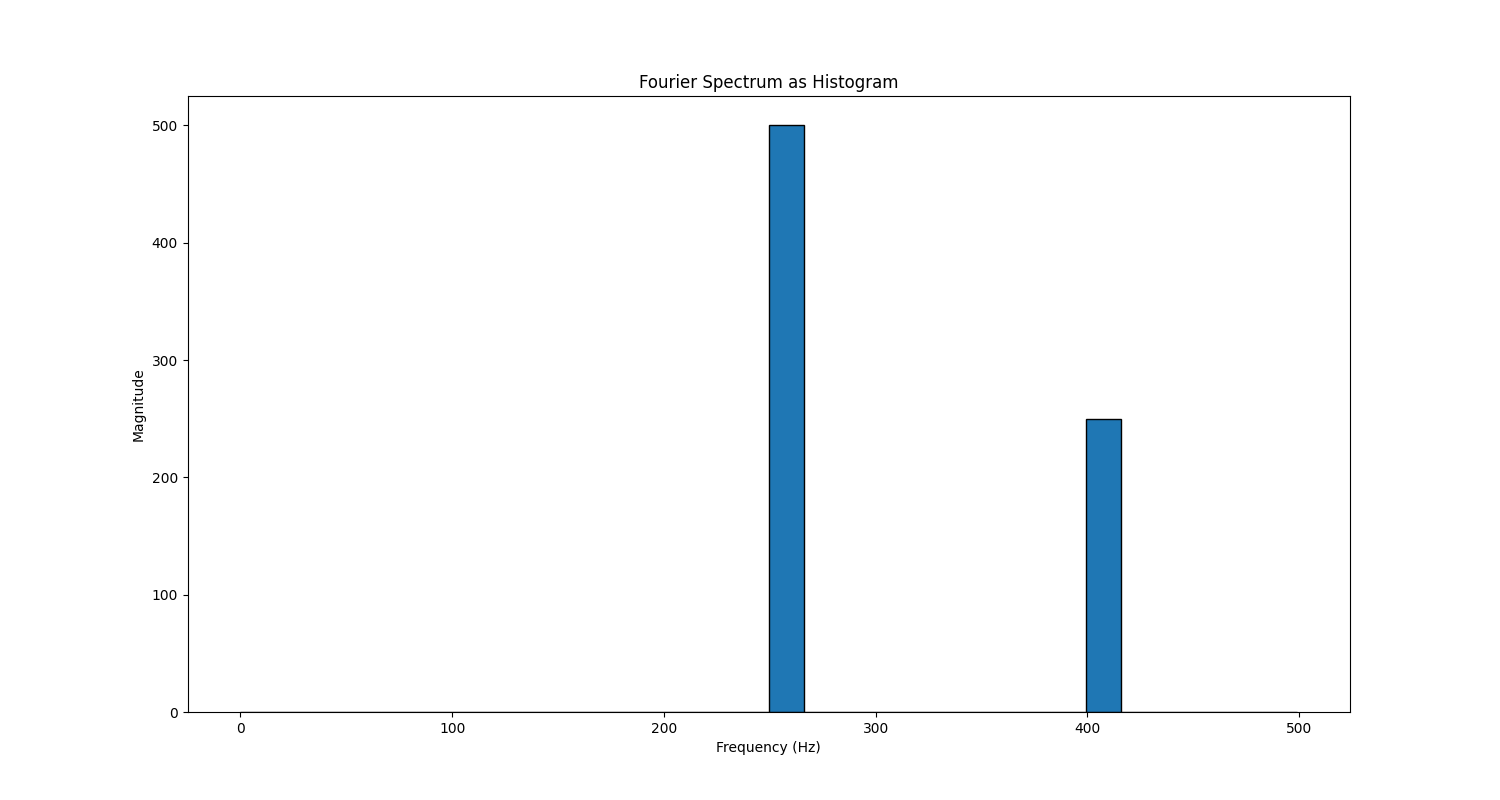

In [11]:
# Fourier Spectrum as Histogram

# Generate a sample signal
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 5, fs, endpoint=False)  # Time vector
sig = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)  # 50Hz + 120Hz components

# Compute FFT
N = len(sig)
frequencies = np.fft.fftfreq(N, 1/fs)[:N//2]  # One-sided frequency range
fft_values = np.abs(fft(sig))[:N//2]  # One-sided magnitude spectrum


# Create histogram-style bins
num_bins = 30  # Number of frequency bins
bin_edges = np.linspace(frequencies.min(), frequencies.max(), num_bins + 1)
hist_values, _ = np.histogram(frequencies, bins=bin_edges, weights=fft_values)

# Plot as a histogram
fig1 = plt.figure()
plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), edgecolor='k', align='edge')
#plt.plot(fft_values)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Spectrum as Histogram')
plt.show()


---
# Low-pass filters
---

In [12]:
# simulation parameters
fs      = 350 # hz
timevec = np.arange(0,fs*7-1)/fs
npnts   = len(timevec)

# generate signal
yOrig = np.cumsum(np.random.randn(npnts))
y     = yOrig + 50*np.random.randn(npnts) + 40*np.sin(2*np.pi*50*timevec)

# power spectrum of signal
yX = np.abs(scipy.fftpack.fft(y)/npnts)**2
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))

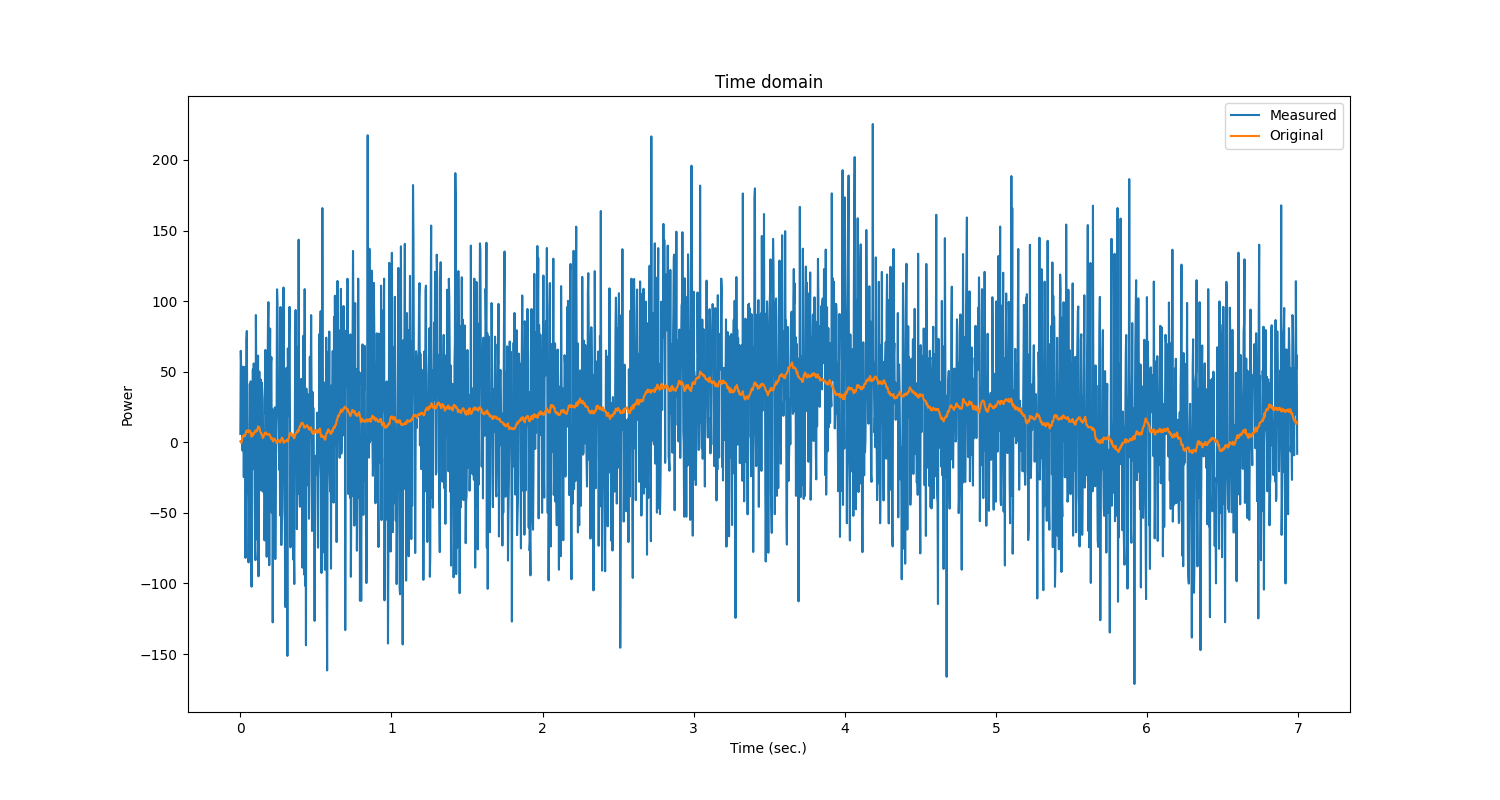

In [13]:
# Time domain data
fig22 = plt.figure()
plt.plot(timevec,y,label='Measured')
plt.plot(timevec,yOrig,label='Original')
plt.xlabel('Time (sec.)')
plt.ylabel('Power')
plt.title('Time domain')
plt.legend()
plt.show()

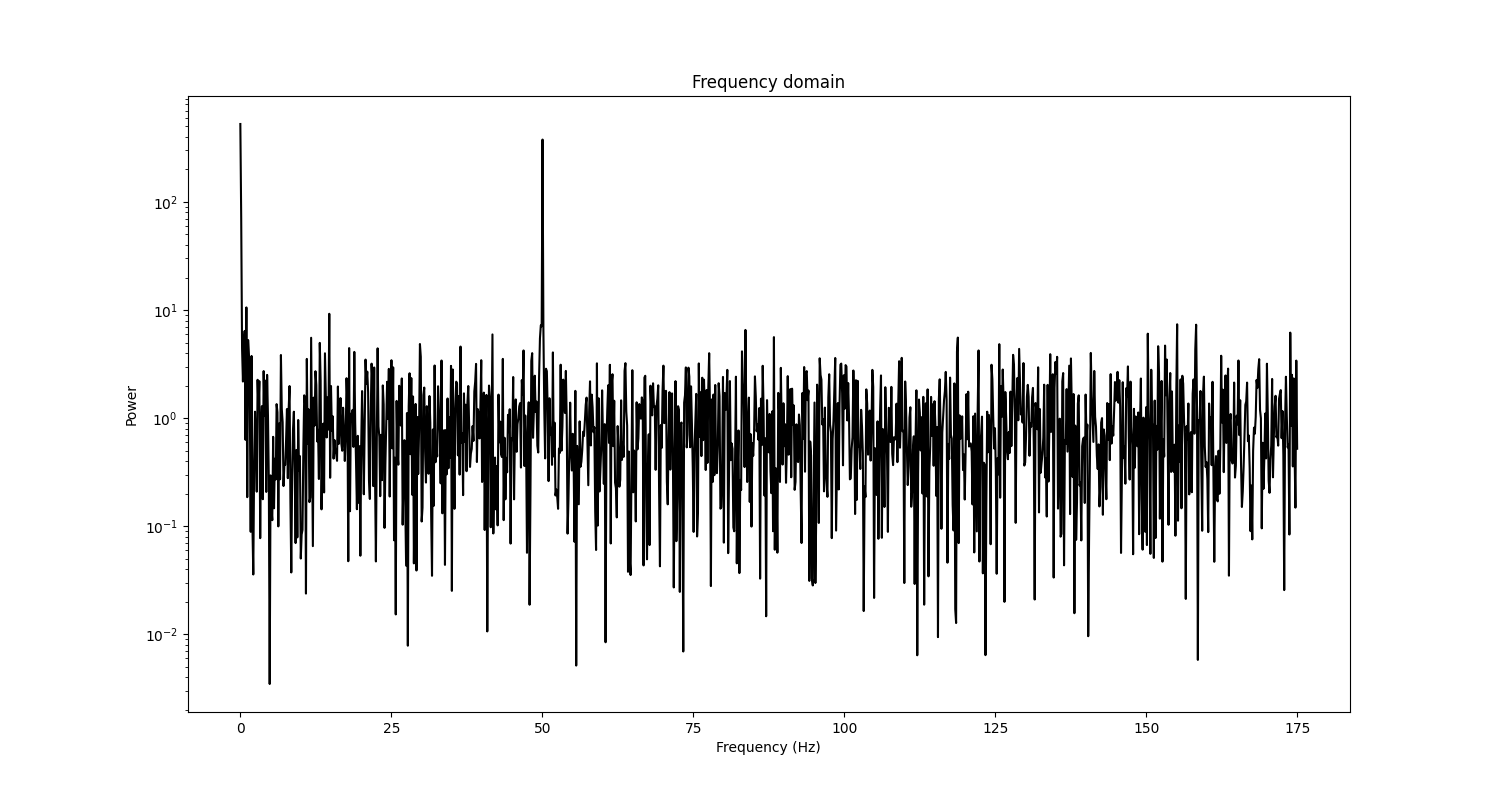

In [16]:
# plot its power spectrum
fig3 = plt.figure()
plt.plot(hz, yX[:len(hz)],'k')
#plt.hist(yX[0:len(hz)], 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency domain')
plt.yscale ('log')
#plt.ylim(bottom = 1) 
plt.show()

In [17]:
def spectrum_hist(fft_values, frequencies, num_bins):
    """Build spectrum as histogramm

    Args:
        fft_values (_type_): _description_
        frequencies (_type_): _description_
        num_bins (_type_): _description_
    """
    # Create histogram-style bins
    bin_edges = np.linspace(frequencies.min(), frequencies.max(), num_bins + 1)
    hist_values, _ = np.histogram(frequencies, bins=bin_edges, weights=fft_values)

    # Plot as a histogram
    plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), edgecolor='k', align='edge') 
    #plt.plot(fft_values)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.yscale('log')
    plt.ylim(bottom = 1)
    plt.title('Fourier Spectrum as Histogram')
    plt.show()

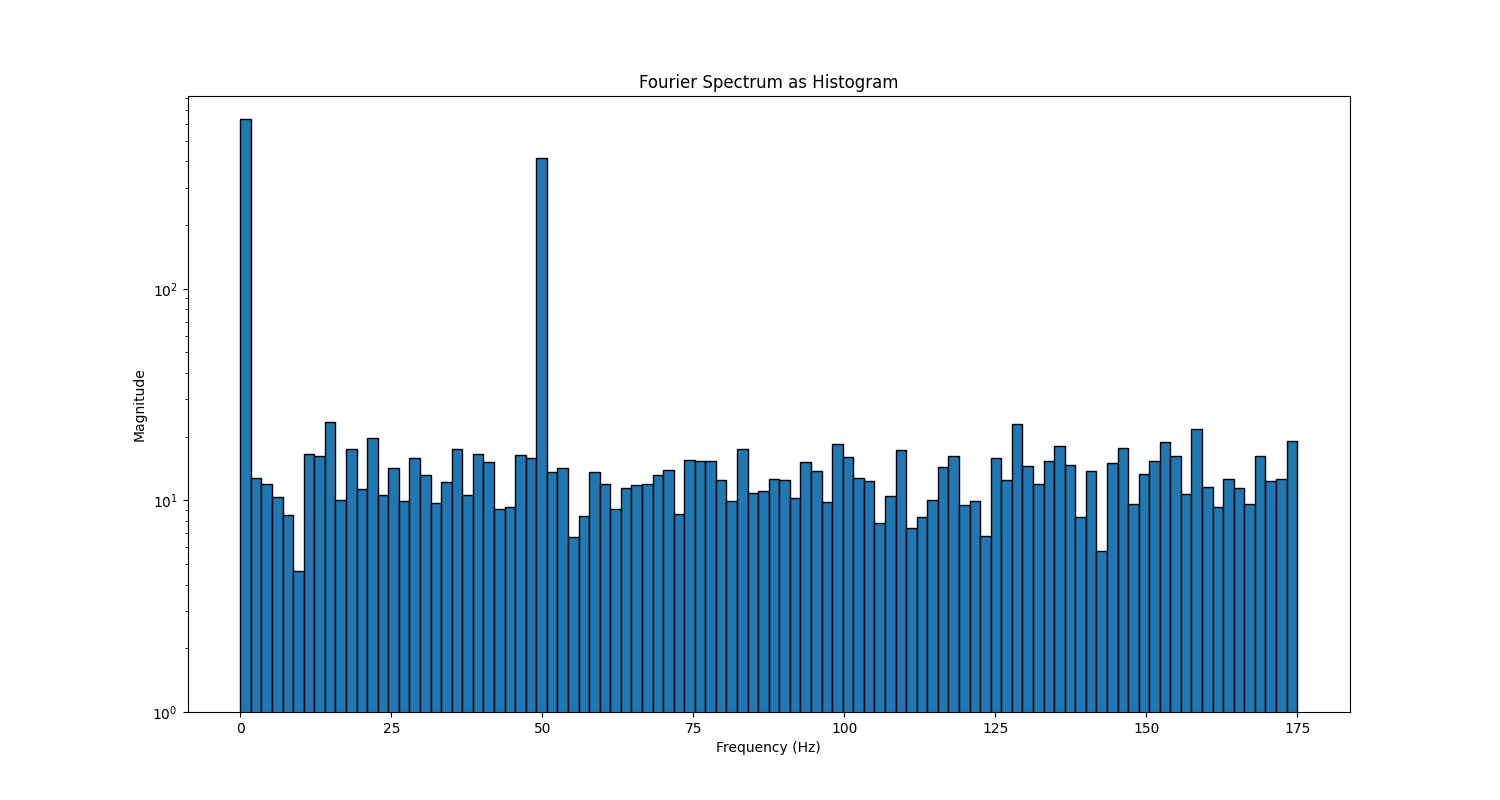

In [18]:
fig7 = plt.figure()
spectrum_hist(yX[:len(hz)], hz, 100)

## Filter kernal

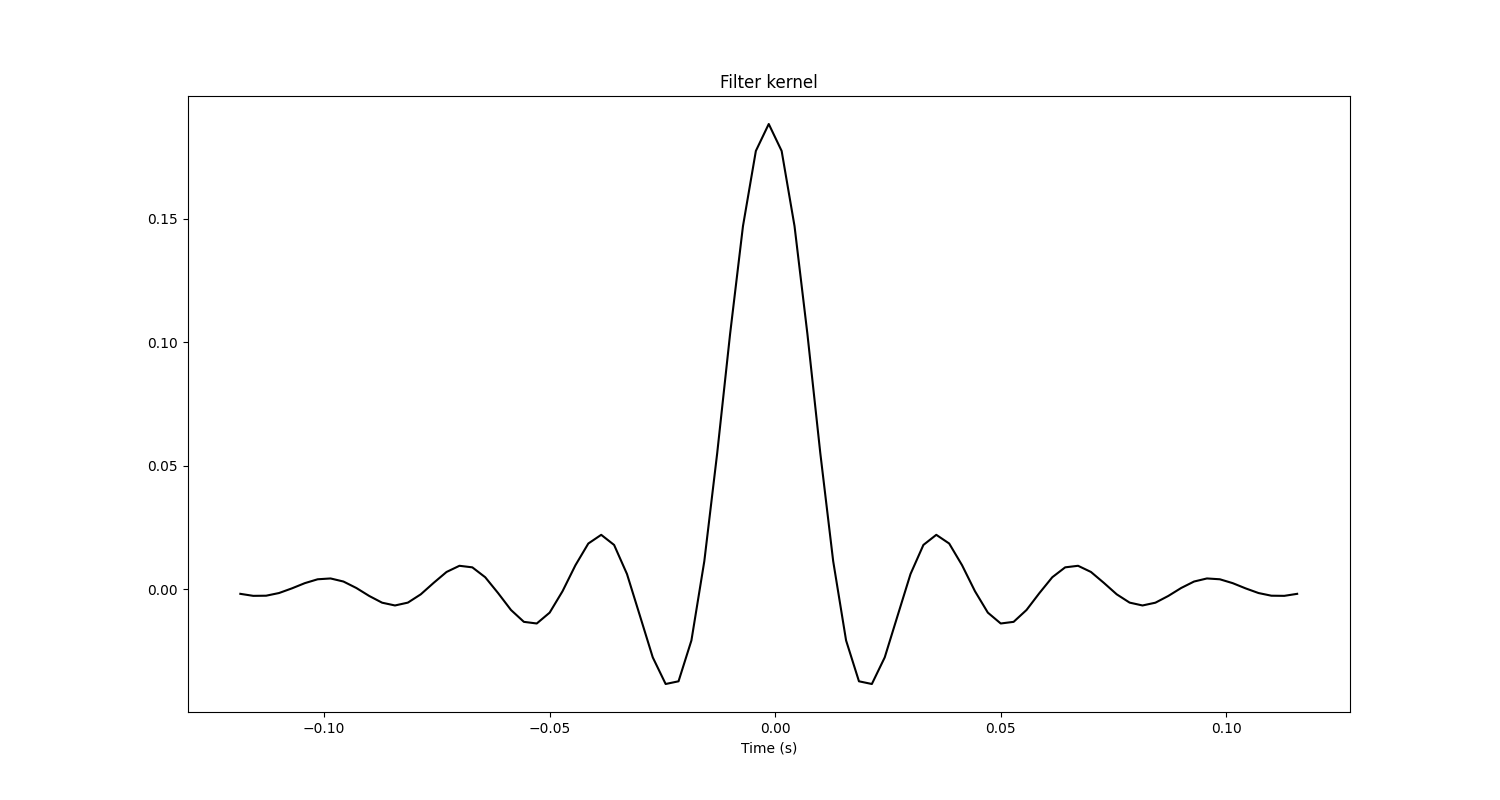

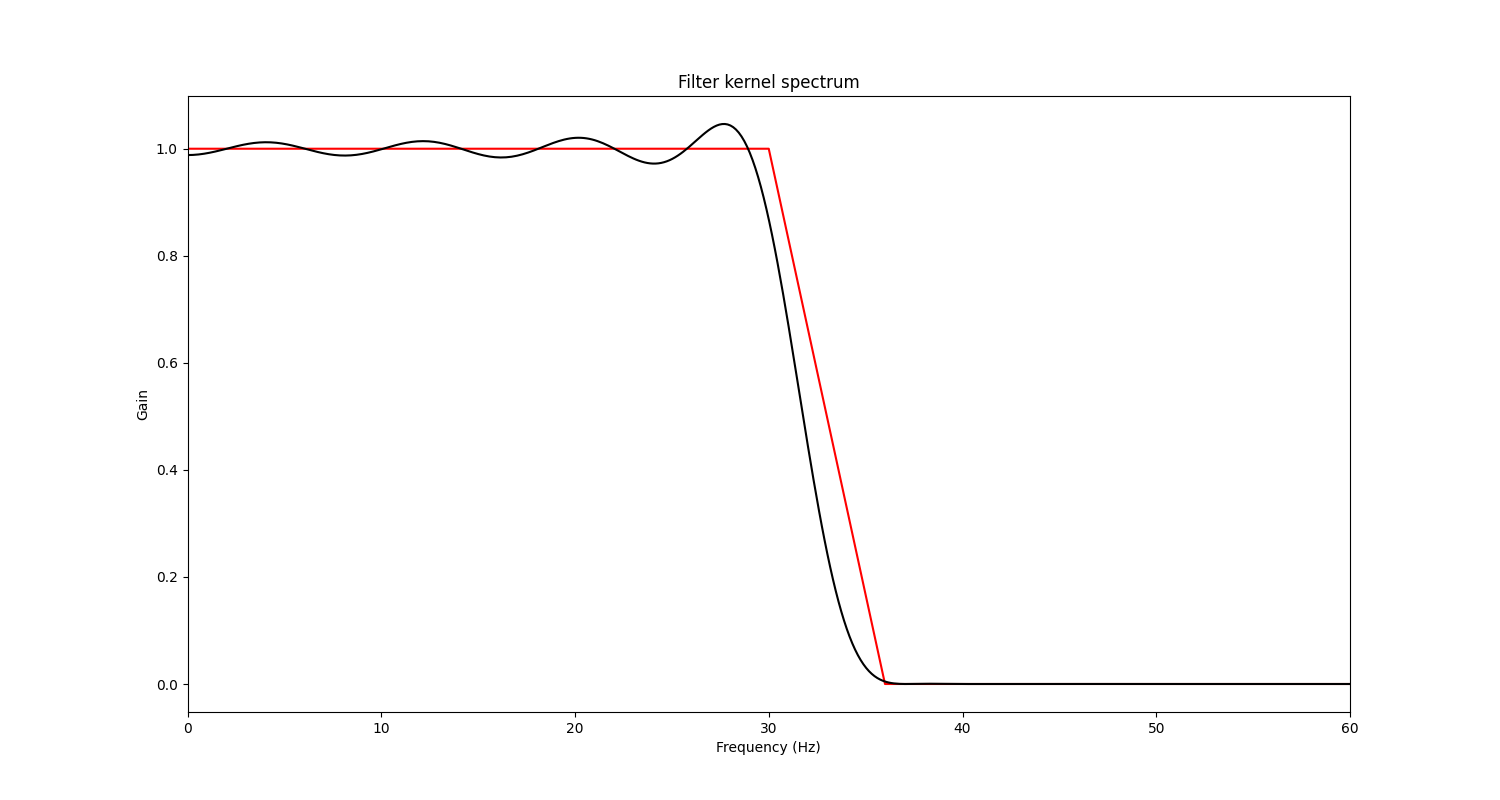

In [21]:
## now for lowpass filter

fcutoff = 30
transw  = .2
order   = np.round( 7*fs/fcutoff )+1

shape   = [ 1,1,0,0 ]
frex    = [ 0, fcutoff, fcutoff+fcutoff*transw, fs/2 ]

# filter kernel
filtkern = signal.firls(order,frex,shape,fs=fs)

# its power spectrum
filtkernX = np.abs(scipy.fftpack.fft(filtkern,npnts))**2

fig35 = plt.figure()
plt.plot(np.arange(-order/2,order/2)/fs,filtkern,'k')
plt.xlabel('Time (s)')
plt.title('Filter kernel')
plt.show()

fig36 = plt.figure()
plt.plot(np.array(frex),shape,'r')
plt.plot(hz,filtkernX[:len(hz)],'k')
plt.xlim([0,60])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Filter kernel spectrum')
plt.show()

In [ ]:
signal.fi

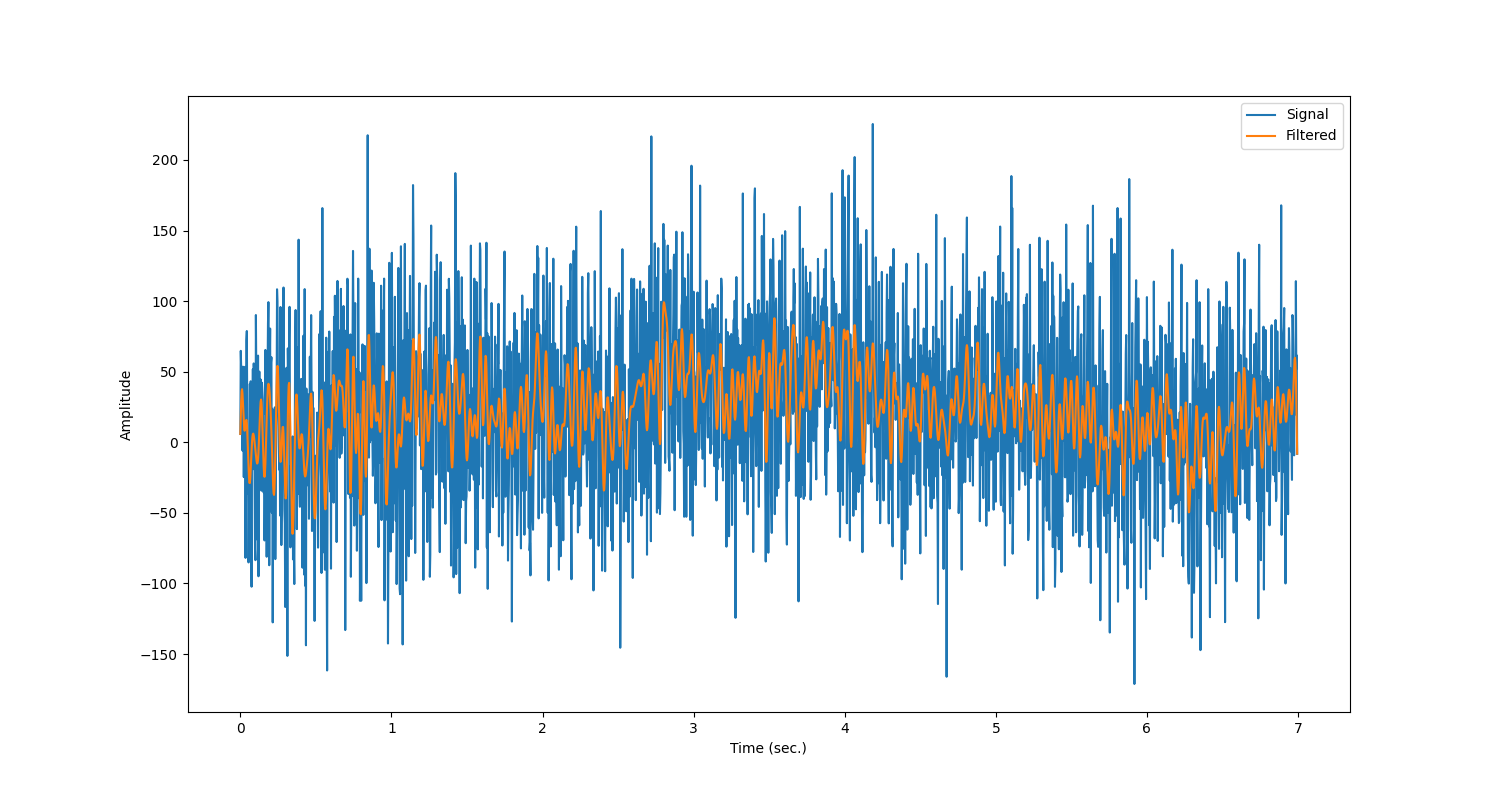

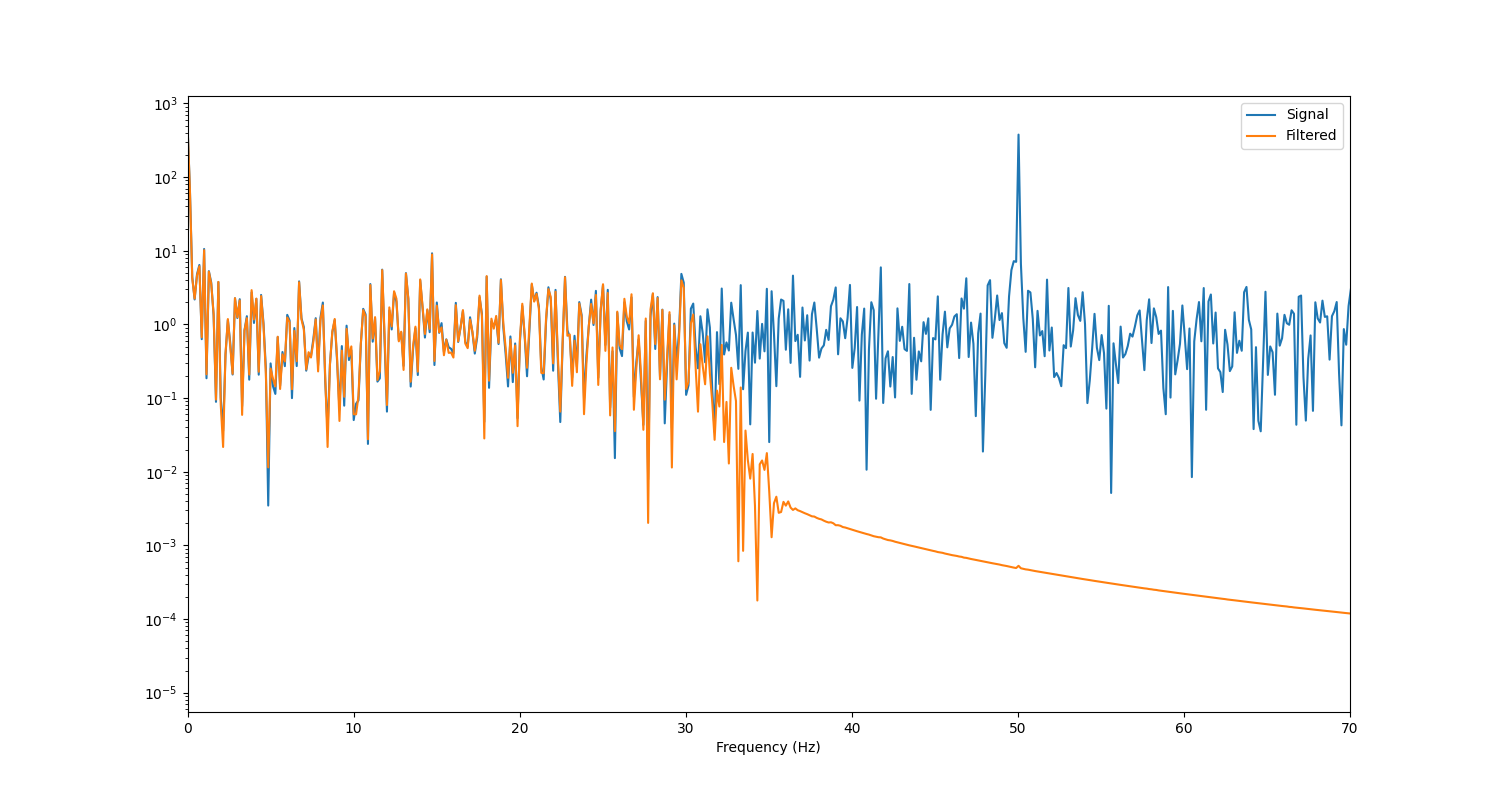

In [25]:
### now apply the filter to the data
yFilt = signal.filtfilt(filtkern,1,y)

fig37 = plt.figure()
plt.plot(timevec,y,label='Signal')
plt.plot(timevec,yFilt,label='Filtered')
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

### power spectra of original and filtered signal
yOrigX = np.abs(scipy.fftpack.fft(y)/npnts)**2
yFiltX = np.abs(scipy.fftpack.fft(yFilt)/npnts)**2

fig38 = plt.figure()
plt.plot(hz,yOrigX[:len(hz)],label='Signal')
plt.plot(hz,yFiltX[:len(hz)],label='Filtered')
plt.xlim([0,fs/5])
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.show()

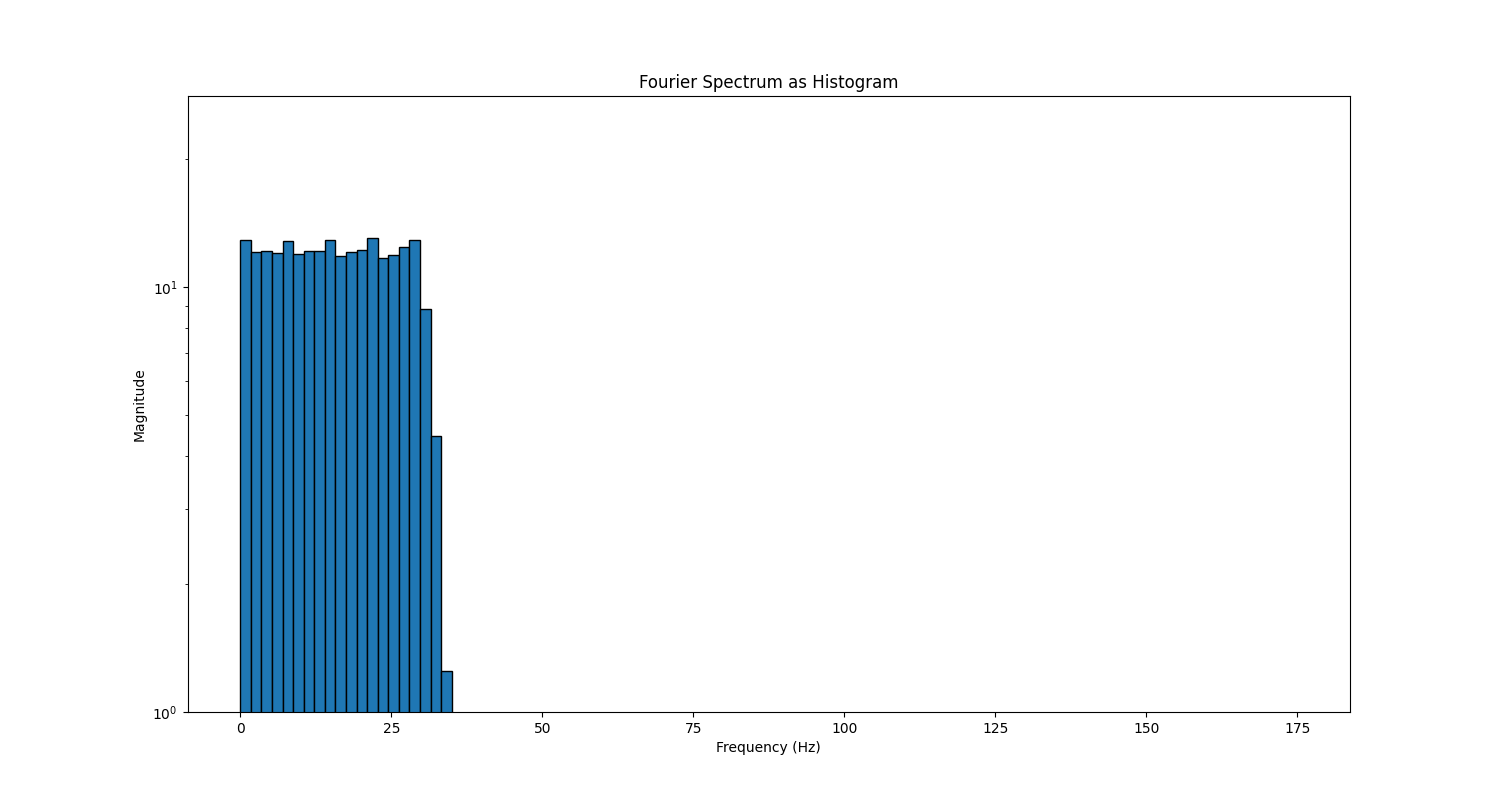

In [26]:
fig11 = plt.figure()
spectrum_hist(filtkernX[:len(hz)], hz, 100)